# Hydrogenic single solution Schrodinger equation

# Solution of Schrodinger’s equation of the form 

$\frac{1}{2} \frac{d^2 u}{dr^2} + v_{effe} u = e_i u$

The solver integrates the equation from r_{min} to r_{max} (forward integration) and vice versa (backwards integration). The function returns the integrated function $u$ and the value of the merge of both forward and backwards solutions.

In [7]:
using Pkg;
Pkg.activate("../.");
using SchrodingerEquationSolver
using Plots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver_examples`


In [8]:
#Define parameters and produce an exponential grid.

r_max::Float64=10.0;
Z::Int64=1; #Atomic number, also used as the charge of coulomb potential.
#grid definition
grid_stru= Grids.init_exponential_grid_structure(r_max, Z);
N=grid_stru.N;
print("grid size ", N)


grid size 6359

In [9]:
#Definition of the potentials with angular quantum number 0 
l::Int64=0;
v_colu= Potentials.coulomb_potential(Z, grid_stru.grid);
v_angu= Potentials.angular_potential(l, grid_stru.grid);
v_effe= v_colu + v_angu;

In [12]:
n::Float64=1.0; #shell level
ei= -0.5*(Z^2 / n^2); #Energy of hydrogenic atom

In [13]:
        v1, dv1, v_end, dv_end, end_i=InitialConditions.atom_exponential_grid(grid_stru, ei, l);

        u_merged, merge_value, merge_ratio= OneDSchrodingerEquationSolver.solver_exponential_grid(ei, v1, dv1, v_end, dv_end, end_i,v_effe, grid_stru);

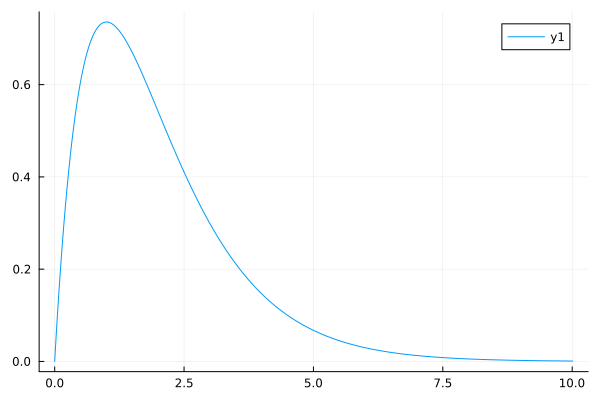

In [16]:
#Plot of the wave functions
plot(grid_stru.grid, u_merged)
#plot(size=(900,400))